# TensorFlow進階技巧
Ch2: 回歸任務  
Ch3: 二元分類任務  
Ch4: 多類別分類任務  
Ch5: 權重初始化及Batch Normalization  

前面章節的模型訓練基本可分為以下步驟:  
1. 搭建網路內部層: tf.keras.layers
2. 建立網路模型: tf.keras.Model
3. 設定優化器、損失函數及指標函數: model.compile
4. 訓練網路模型: model.fit  

上述可發現都是內部API所建構完成，以下將介紹客製化的API。

## 客製化網路層(Layers)
可透過繼承**tf.keras.layers.Layer類別**，來完成自定義。

In [2]:
import tensorflow as tf
class CustomLayer(tf.keras.layers.Layer):
    # *args: tuple、**kwargs: dictionary，兩個表示有非預期的變數
    def __init__(self, **kwargs):
        super(CustomLayer, self).__init__(**kwargs)
        """
        設定參數的地方。
        """
    def build(self, input_shape):
        """
        建立權重的地方(透過add_weight方法)。
        參數:
            input_shape: 輸入大小。
        """
    def call(self, inputs):
        """
        定義網路前向傳遞(運算)的地方。
        參數:
            inputs: 輸入網路的資料。
        """
    def get_config(self):
        """
        (選擇)如果你要支援序列化，要在這裡定義，它會傳回層的構建參數。
        """

## 客製化損失函數(Loss)

In [3]:
def custom_loss(y_true, y_pred):
    """
    定義loss計算在這個地方。
    參數:
        y_true(真實值): 傳入這筆資料的答案。
        y_pred(預測值): 傳入這筆資料網路預測的結果。
    """
    return loss

## 客製化指標函數(Metrics)
可透過繼承**tf.keras.metrics.Metric類別**，來完成自定義。

In [4]:
class CustomMetrics(tf.keras.metrics.Metric):
    def __init__(self, name='custom_metrics', **kwargs):
        super(CustomMetrics, self).__init__(name=name, **kwargs)
        """
        所有指標函數使用到的狀態變數都需要在這裡建立。
        參數:
            name: 指標函數名稱。
        """
    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        使用y_true(真實值)與y_pred(預測值)來計算更新狀態變數。
        參數:
            y_true(真實值): 傳入這筆資料的答案。
            y_pred(預測值): 傳入這筆資料網路預測的結果。
            sample_weight: 對樣本的權重，通常是用在序列模型。
        """
    def result(self):
        """
        使用狀態變數計算最終的結果。
        """
    def reset_states(self):
        """
        重新初始化指標函數(狀態變數)。
        """

## 客製化回調函數(Callback)
回調函數主要是負責模型在**訓練(model.fit)**、**測試(model.evaluate)**或**預測(model.predict)**的時候從中監控、紀錄或調整模型。  
以下是常用的回調函數:  
1. tf.keras.callbacks.ModelCheckpoint：監測數值，將最好的模型權重儲存下來。  
2. tf.keras.callbacks.EarlyStopping：如果模型的監測數值太久沒進步，會提前終止訓練。  
3. tf.keras.callbacks.ReduceLROnPlateau：如果模型的監測數值太久沒進步，將會降低學習率。  
4. tf.keras.callbacks.TensorBoard：紀錄模型訓練過程、權重和Graph。  

可透過繼承tf.keras.callbacks.Callback，來完成自定義。

In [5]:
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_(begin|end)(self, epoch, logs=None):
        """
        每一個epoch開始或結束，執行這段。
        參數:
            epoch: 目前的epoch。
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
    def on_(train|test|predict)_begin(self, logs=None):
        """
        fit、evaluate或predict任務開始時，執行這段。
        參數:
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
    def on_(train|test|predict)_end(self, logs=None):
        """
        fit、evaluate或predict任務結束時，執行這段。
        參數:
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
    def on_(train|test|predict)_batch_begin(self, batch, logs=None):
        """
        fit、evaluate或predict任務的每一個batch開始前執行這段。
        參數:
            batch: 目前的batch。
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
    def on_(train|test|predict)_batch_end(self, batch, logs=None):
        """
        fit、evaluate或predict任務的每一個batch結束後執行這段。
        參數:
            batch: 目前的batch。
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """

SyntaxError: invalid syntax (2256326508.py, line 2)

# Keras高階API與客製化API比較

## 網路層(Layers)
。Kernel數量: 64  
。Kernel大小: 3 x 3  
。Strides: 1  
。Padding: valid  
。activation: ReLU  
。Kernel初始化: glorot_uniform  
。Bias初始化: zeros  

In [8]:
# 方法一
tf.keras.layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')
# 方法二
class CustomConv2D(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides=(1, 1), padding="VALID", **kwargs):
        super(CustomConv2D, self).__init__(**kwargs)
        """
        設定參數的地方。
        """
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = (1, *strides, 1)
        self.padding = padding
        
    def build(self, input_shape):
        """
        建立權重的地方(透過add_weight方法)。
        參數:
            input_shape: 輸入大小。
        """
        kernel_h, kernel_w = self.kernel_size
        input_dim = input_shape[-1]
        # 建立卷積層的權重值 (weight)
        self.w = self.add_weight(name='kernel',
                                 shape=(kernel_h, kernel_w, input_dim, self.filters),
                                 initializer='glorot_uniform', # 設定初始化方法
                                 trainable=True # 設定這個權重是否能夠訓練 (更動)
                                )
        # 建立卷積層的偏差值 (bias)
        self.b = self.add_weight(name='bias',
                                 shape=(self.filters, ),
                                 initializer='zeros', # 設定初始化方法
                                 trainable=True # 設定這個權重是否能夠訓練 (更動)
                                )
        
    def call(self, inputs):
        """
        定義網路前向傳遞(運算)的地方。
        參數:
            inputs: 輸入網路的資料。
        """
        # 卷積運算
        x = tf.nn.conv2d(inputs, self.w, self.strides, padding=self.padding)
        x = tf.nn.bias_add(x, self.b) # 加上偏差值
        x = tf.nn.relu(x) # 激勵函數
        return x
        

## 損失函數(Loss)
建立: Categorical Cross-Entropy (CCE)

In [9]:
# 方法一
tf.keras.losses.CategoricalCrossentropy()
# 方法二
def custom_categorical_crossentropy(y_true, y_pred):
    """
    定義loss計算在這個地方。
    參數:
        y_true(真實值): 傳入這筆資料的答案。
        y_pred(預測值): 傳入這筆資料網路預測的結果。
    """
    x = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return x

## 指標函數(Metrics)
建立: Categorical Accuracy

In [10]:
# 方法一
tf.keras.metrics.CategoricalAccuracy()
# 方法二
class CustomCategoricalAccuracy(tf.keras.metrics.Metric):
    def __init__(self, name='custom_categorical_accuracy', **kwargs):
        super(CustomCategoricalAccuracy, self).__init__(name=name, **kwargs)
        """
        所有指標函數使用到的狀態變數都需要在這裡建立。
        參數:
            name: 指標函數名稱。
        """
        # 紀錄正確預測的數量
        self.correct = self.add_weight('correct_numbers', initializer='zeros')
        # 紀錄全部資料的量數
        self.total = self.add_weight('total_numbers', initializer='zeros')
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        使用y_true(真實值)與y_pred(預測值)來計算更新狀態變數。
        參數:
            y_true(真實值): 傳入這筆資料的答案。
            y_pred(預測值): 傳入這筆資料網路預測的結果。
            sample_weight: 對樣本的權重，通常是用在序列模型。
        """
        # 輸入答案為One-hot Encoding，所以取最大的數值為答案
        y_true = tf.argmax(y_true, axis=-1)
        # 取預測輸出最大的數值為預測結果
        y_pred = tf.argmax(y_pred, axis=-1)
        # 比較預測結果是否正確，正確: True、錯誤: False
        values = tf.equal(y_true, y_pred)
        # 將 True 和 False 轉為浮點數
        values = tf.cast(values, tf.float32)
        # 將values所有數值相加就會等於正確預測的總數
        values_sum = tf.reduce_sum(values)
        # 計算這個Batch的資料數量
        num_values = tf.cast(tf.size(values), tf.float32)
        # 更新正確的預測總數
        self.correct.assign_add(values_sum)
        # 更新資料量的預測總數
        self.total.assign_add(num_values)
        
    def result(self):
        """
        使用狀態變數計算最終的結果。
        """
        # 計算準確率
        return tf.math.divide_no_nan(self.correct, self.total)
        
    def reset_states(self):
        """
        重新初始化指標函數(狀態變數)。
        """
        # 每一次Epoch結束後會重新初始化變數
        self.correct.assign(0.)
        self.total.assign(0.)

## 回調函數(Callback)
建立儲存模型權重的方法

In [12]:
# 方法一
tf.keras.callbacks.ModelCheckpoint('./models/Ch6/save.h5')
# 方法二
class SaveModel(tf.keras.callbacks.Callback):
    def __init__(self, weights_file, monitor='loss', mode='min', save_weights_only=False):
        super(SaveModel, self).__init__()
        # 設定模型權重的儲存方法
        self.weights_file = weights_file
        # 設定要監測的數值
        self.monitor = monitor
        # 設定監測值要「越大越好」還是「越小越好」
        # Ex:監測數值為loss須設為'min'，如果監測數值為Accuracy則設為'max'
        self.mode = mode
        # 「只儲存網路權重」或「儲存整個網路模型」(包含Layer, Compile等)
        self.save_weights_only = save_weights_only
        if mode == 'min':
            # 設定 best 為無限大
            self.best = np.Inf
        else:
            # 設定 best 為負無限大
            self.best = -np.Inf
            
    # 儲存網路模型的函數
    def save_model(self):
        if self.save_weights_only:
            # 只儲存網路權重
            self.model.save_weights(self.weights_file)
        else:
            # 儲存整個網路模型
            self.model.save(self.weights_file)
    
    def on_epoch_end(self, epoch, logs=None):
        """
        每一個epoch結束，執行這段。
        參數:
            epoch: 目前的epoch。
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
        # 從logs中讀取監測值
        monitor_value = logs.get(self.monitor)
        # 如果監測值有降低或升高(取決於mode設定)，則儲存網路模型
        if self.mode == 'min' and monitor_value < self.best:
            self.save_model()
            self.best = monitor_value
        elif self.mode == 'max' and monitor_value > self.best:
            self.save_model()
            self.best = monitor_value

# 實驗：比較Keras高階API和客製化API兩種網路訓練的結果

In [13]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import initializers
from preprocessing import parse_aug_fn, parse_fn

In [14]:
# 載入 CIFAR-10資料集
train_split, valid_split = ["train[:90%]", "train[90:]"] # 訓練:驗證 = 9:1
train_data, info = tfds.load("cifar10", split=train_split, with_info=True) # 讀取訓練資料及Data的資訊
valid_data = tfds.load("cifar10", split=valid_split) # 讀取驗證資料
test_data = tfds.load("cifar10", split="test")

In [15]:
info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE # 自行調整模式
batch_size = 128 # 批次大小
train_num = int(info.splits['train'].num_examples / 10) * 9 # 訓練資料數量

In [17]:
# 打散資料
train_data = train_data.shuffle(train_num)
# 載入預處理 parse_aug_fn()，CPU數量為自動調整模式
train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小，並將 prefetch 模式打開(暫存空間為自動調整模式)
train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)
# 載入預處理 parse_fn()，CPU數量為自動調整模式
valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)
# 載入預處理 parse_fn()，CPU數量為自動調整模式
test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

### 使用Keras高階API訓練網路模型

In [18]:
# 建立模型
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(256, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(128, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Conv2D(64, 3, activation='relu', kernel_initializer='glorot_uniform')(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)
model_1 = keras.Model(inputs, outputs, name='model-1')
model_1.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 128)         295040    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          7379

In [19]:
# 建立資料夾
model_dir = './models/Ch6/'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# 設定Optimizer、Loss Function、Metrics Function
model_1.compile(keras.optimizers.Adam(),
                # 由於輸出層沒有手動加上Softmax，所以將from_logits設為True
                loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                metrics=[keras.metrics.CategoricalAccuracy()])

# 儲存訓練記錄檔
log_dir = os.path.join('./models/Ch6', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/save-1.h5',
                                             monitor='val_categorical_accuracy',
                                             mode='max')
# 開始訓練
hitstory_1 = model_1.fit(train_data,
                         epochs=100,
                         validation_data=valid_data,
                         callbacks=[model_cbk, model_mckp])

Epoch 1/100
  1/352 [..............................] - ETA: 0s - loss: 2.3039 - categorical_accuracy: 0.1406WARNING:tensorflow:From C:\Users\a7032\AI_Deep_Learing\Tensorflow2\tf2\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


  2/352 [..............................] - ETA: 16s - loss: 2.3029 - categorical_accuracy: 0.1250WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0105s vs `on_train_batch_end` time: 0.0823s). Check your callbacks.


352/352 [==============================] - 11s 31ms/step - loss: 2.0717 - categorical_accuracy: 0.2232 - val_loss: 1.6814 - val_categorical_accuracy: 0.3799
Epoch 2/100
352/352 [==============================] - 10s 29ms/step - loss: 1.8121 - categorical_accuracy: 0.3374 - val_loss: 1.5591 - val_categorical_accuracy: 0.4352
Epoch 3/100
352/352 [==============================] - 10s 29ms/step - loss: 1.7051 - categorical_accuracy: 0.3823 - val_loss: 1.4239 - val_categorical_accuracy: 0.4990
Epoch 4/100
352/352 [==============================] - 10s 28ms/step - loss: 1.6127 - categorical_accuracy: 0.4209 - val_loss: 1.3561 - val_categorical_accuracy: 0.5071
Epoch 5/100
352/352 [==============================] - 10s 28ms/step - loss: 1.5485 - categorical_accuracy: 0.4476 - val_loss: 1.1875 - val_categorical_accuracy: 0.5740
Epoch 6/100
352/352 [==============================] - 10s 29ms/step - loss: 1.4826 - categorical_accuracy: 0.4716 - val_loss: 1.1371 - val_categorical_accuracy: 0.597

352/352 [==============================] - 10s 29ms/step - loss: 0.8489 - categorical_accuracy: 0.7156 - val_loss: 0.4996 - val_categorical_accuracy: 0.8315
Epoch 50/100
352/352 [==============================] - 10s 29ms/step - loss: 0.8436 - categorical_accuracy: 0.7160 - val_loss: 0.4570 - val_categorical_accuracy: 0.8459
Epoch 51/100
352/352 [==============================] - 10s 29ms/step - loss: 0.8405 - categorical_accuracy: 0.7180 - val_loss: 0.4499 - val_categorical_accuracy: 0.8478
Epoch 52/100
352/352 [==============================] - 10s 29ms/step - loss: 0.8372 - categorical_accuracy: 0.7192 - val_loss: 0.4518 - val_categorical_accuracy: 0.8445
Epoch 53/100
352/352 [==============================] - 10s 28ms/step - loss: 0.8408 - categorical_accuracy: 0.7188 - val_loss: 0.4550 - val_categorical_accuracy: 0.8430
Epoch 54/100
352/352 [==============================] - 10s 29ms/step - loss: 0.8219 - categorical_accuracy: 0.7233 - val_loss: 0.4652 - val_categorical_accuracy: 

352/352 [==============================] - 10s 29ms/step - loss: 0.6971 - categorical_accuracy: 0.7723 - val_loss: 0.3220 - val_categorical_accuracy: 0.8955
Epoch 98/100
352/352 [==============================] - 10s 29ms/step - loss: 0.6943 - categorical_accuracy: 0.7716 - val_loss: 0.3352 - val_categorical_accuracy: 0.8889
Epoch 99/100
352/352 [==============================] - 10s 29ms/step - loss: 0.6957 - categorical_accuracy: 0.7731 - val_loss: 0.3227 - val_categorical_accuracy: 0.8915
Epoch 100/100
352/352 [==============================] - 10s 29ms/step - loss: 0.6862 - categorical_accuracy: 0.7734 - val_loss: 0.3029 - val_categorical_accuracy: 0.9005


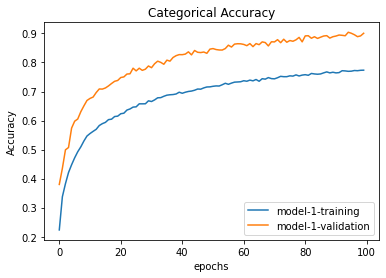

In [22]:
plt.plot(hitstory_1.history['categorical_accuracy'], label='model-1-training')
plt.plot(hitstory_1.history['val_categorical_accuracy'], label='model-1-validation')
plt.title('Categorical Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### 使用客製化API訓練網路模型

In [31]:
# 建立 Convoluation layer
class CustomConv2D(tf.keras.layers.Layer):
    def __init__(self, filters, kernel_size, strides=(1, 1), padding="VALID", **kwargs):
        super(CustomConv2D, self).__init__(**kwargs)
        """
        設定參數的地方。
        """
        self.filters = filters
        self.kernel_size = kernel_size
        self.strides = (1, *strides, 1)
        self.padding = padding
        
    def build(self, input_shape):
        """
        建立權重的地方(透過add_weight方法)。
        參數:
            input_shape: 輸入大小。
        """
        kernel_h, kernel_w = self.kernel_size
        input_dim = input_shape[-1]
        # 建立卷積層的權重值 (weight)
        self.w = self.add_weight(name='kernel',
                                 shape=(kernel_h, kernel_w, input_dim, self.filters),
                                 initializer='glorot_uniform', # 設定初始化方法
                                 trainable=True # 設定這個權重是否能夠訓練 (更動)
                                )
        # 建立卷積層的偏差值 (bias)
        self.b = self.add_weight(name='bias',
                                 shape=(self.filters, ),
                                 initializer='zeros', # 設定初始化方法
                                 trainable=True # 設定這個權重是否能夠訓練 (更動)
                                )
        
    def call(self, inputs):
        """
        定義網路前向傳遞(運算)的地方。
        參數:
            inputs: 輸入網路的資料。
        """
        # 卷積運算
        x = tf.nn.conv2d(inputs, self.w, self.strides, padding=self.padding)
        x = tf.nn.bias_add(x, self.b) # 加上偏差值
        x = tf.nn.relu(x) # 激勵函數
        return x

In [32]:
# 建立 Loss Function
def custom_categorical_crossentropy(y_true, y_pred):
    """
    定義loss計算在這個地方。
    參數:
        y_true(真實值): 傳入這筆資料的答案。
        y_pred(預測值): 傳入這筆資料網路預測的結果。
    """
    x = tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred)
    return x

In [33]:
# 建立 Metrics
class CustomCategoricalAccuracy(tf.keras.metrics.Metric):
    def __init__(self, name='custom_categorical_accuracy', **kwargs):
        super(CustomCategoricalAccuracy, self).__init__(name=name, **kwargs)
        """
        所有指標函數使用到的狀態變數都需要在這裡建立。
        參數:
            name: 指標函數名稱。
        """
        # 紀錄正確預測的數量
        self.correct = self.add_weight('correct_numbers', initializer='zeros')
        # 紀錄全部資料的量數
        self.total = self.add_weight('total_numbers', initializer='zeros')
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        使用y_true(真實值)與y_pred(預測值)來計算更新狀態變數。
        參數:
            y_true(真實值): 傳入這筆資料的答案。
            y_pred(預測值): 傳入這筆資料網路預測的結果。
            sample_weight: 對樣本的權重，通常是用在序列模型。
        """
        # 輸入答案為One-hot Encoding，所以取最大的數值為答案
        y_true = tf.argmax(y_true, axis=-1)
        # 取預測輸出最大的數值為預測結果
        y_pred = tf.argmax(y_pred, axis=-1)
        # 比較預測結果是否正確，正確: True、錯誤: False
        values = tf.equal(y_true, y_pred)
        # 將 True 和 False 轉為浮點數
        values = tf.cast(values, tf.float32)
        # 將values所有數值相加就會等於正確預測的總數
        values_sum = tf.reduce_sum(values)
        # 計算這個Batch的資料數量
        num_values = tf.cast(tf.size(values), tf.float32)
        # 更新正確的預測總數
        self.correct.assign_add(values_sum)
        # 更新資料量的預測總數
        self.total.assign_add(num_values)
        
    def result(self):
        """
        使用狀態變數計算最終的結果。
        """
        # 計算準確率
        return tf.math.divide_no_nan(self.correct, self.total)
        
    def reset_states(self):
        """
        重新初始化指標函數(狀態變數)。
        """
        # 每一次Epoch結束後會重新初始化變數
        self.correct.assign(0.)
        self.total.assign(0.)

In [34]:
# 建立 Callback
class SaveModel(tf.keras.callbacks.Callback):
    def __init__(self, weights_file, monitor='loss', mode='min', save_weights_only=False):
        super(SaveModel, self).__init__()
        # 設定模型權重的儲存方法
        self.weights_file = weights_file
        # 設定要監測的數值
        self.monitor = monitor
        # 設定監測值要「越大越好」還是「越小越好」
        # Ex:監測數值為loss須設為'min'，如果監測數值為Accuracy則設為'max'
        self.mode = mode
        # 「只儲存網路權重」或「儲存整個網路模型」(包含Layer, Compile等)
        self.save_weights_only = save_weights_only
        if mode == 'min':
            # 設定 best 為無限大
            self.best = np.Inf
        else:
            # 設定 best 為負無限大
            self.best = -np.Inf
            
    # 儲存網路模型的函數
    def save_model(self):
        if self.save_weights_only:
            # 只儲存網路權重
            self.model.save_weights(self.weights_file)
        else:
            # 儲存整個網路模型
            self.model.save(self.weights_file)
    
    def on_epoch_end(self, epoch, logs=None):
        """
        每一個epoch結束，執行這段。
        參數:
            epoch: 目前的epoch。
            logs: 傳入dict格式的紀錄資訊，例如: loss, val_loss等。
        """
        # 從logs中讀取監測值
        monitor_value = logs.get(self.monitor)
        # 如果監測值有降低或升高(取決於mode設定)，則儲存網路模型
        if self.mode == 'min' and monitor_value < self.best:
            self.save_model()
            self.best = monitor_value
        elif self.mode == 'max' and monitor_value > self.best:
            self.save_model()
            self.best = monitor_value

In [35]:
# 建立模型，客製化 Convoluation layer
inputs = keras.Input(shape=(32, 32, 3))
x = CustomConv2D(64, (3, 3))(inputs)
x = layers.MaxPool2D()(x)
x = CustomConv2D(128, (3, 3))(x)
x = CustomConv2D(256, (3, 3))(x)
x = CustomConv2D(128, (3, 3))(x)
x = CustomConv2D(64, (3, 3))(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)
model_2 = keras.Model(inputs, outputs, name='model-2')
model_2.summary()

Model: "model-2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
custom_conv2d_5 (CustomConv2 (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
custom_conv2d_6 (CustomConv2 (None, 13, 13, 128)       73856     
_________________________________________________________________
custom_conv2d_7 (CustomConv2 (None, 11, 11, 256)       295168    
_________________________________________________________________
custom_conv2d_8 (CustomConv2 (None, 9, 9, 128)         295040    
_________________________________________________________________
custom_conv2d_9 (CustomConv2 (None, 7, 7, 64)          7379

In [37]:
# 設定Optimizer、Loss Function、Metrics Function
model_2.compile(keras.optimizers.Adam(),
                loss=custom_categorical_crossentropy, # 客製化 Loss 
                metrics=[CustomCategoricalAccuracy()]) # 客製化 Metrics

# 儲存訓練記錄檔
log_dir = os.path.join('./models/Ch6', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

# 儲存網路模型權重
custom_save_model = SaveModel(model_dir + '/save-2.h5',
                              monitor='val_custom_categorical_accuracy',
                              mode='max',
                              save_weights_only=True
                             )
# 開始訓練
history_2 = model_2.fit(train_data,
                        epochs=100,
                        validation_data=valid_data,
                        callbacks=[model_cbk, custom_save_model])

Epoch 1/100
  2/352 [..............................] - ETA: 18s - loss: 1.9976 - custom_categorical_accuracy: 0.2773WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0120s vs `on_train_batch_end` time: 0.0931s). Check your callbacks.


352/352 [==============================] - 10s 29ms/step - loss: 1.8052 - custom_categorical_accuracy: 0.3316 - val_loss: 1.4990 - val_custom_categorical_accuracy: 0.4633
Epoch 2/100
352/352 [==============================] - 10s 29ms/step - loss: 1.6927 - custom_categorical_accuracy: 0.3830 - val_loss: 1.3786 - val_custom_categorical_accuracy: 0.5020
Epoch 3/100
352/352 [==============================] - 10s 29ms/step - loss: 1.6099 - custom_categorical_accuracy: 0.4172 - val_loss: 1.3071 - val_custom_categorical_accuracy: 0.5277
Epoch 4/100
352/352 [==============================] - 10s 29ms/step - loss: 1.5360 - custom_categorical_accuracy: 0.4506 - val_loss: 1.1525 - val_custom_categorical_accuracy: 0.5857
Epoch 5/100
352/352 [==============================] - 10s 29ms/step - loss: 1.4711 - custom_categorical_accuracy: 0.4804 - val_loss: 1.0884 - val_custom_categorical_accuracy: 0.6215
Epoch 6/100
352/352 [==============================] - 10s 29ms/step - loss: 1.4087 - custom_cate

Epoch 46/100
352/352 [==============================] - 10s 28ms/step - loss: 0.8498 - custom_categorical_accuracy: 0.7171 - val_loss: 0.4778 - val_custom_categorical_accuracy: 0.8364
Epoch 47/100
352/352 [==============================] - 10s 28ms/step - loss: 0.8507 - custom_categorical_accuracy: 0.7151 - val_loss: 0.4497 - val_custom_categorical_accuracy: 0.8467
Epoch 48/100
352/352 [==============================] - 10s 28ms/step - loss: 0.8399 - custom_categorical_accuracy: 0.7191 - val_loss: 0.4702 - val_custom_categorical_accuracy: 0.8405
Epoch 49/100
352/352 [==============================] - 10s 28ms/step - loss: 0.8423 - custom_categorical_accuracy: 0.7183 - val_loss: 0.4781 - val_custom_categorical_accuracy: 0.8393
Epoch 50/100
352/352 [==============================] - 10s 28ms/step - loss: 0.8302 - custom_categorical_accuracy: 0.7210 - val_loss: 0.4610 - val_custom_categorical_accuracy: 0.8470
Epoch 51/100
352/352 [==============================] - 10s 28ms/step - loss: 0.

352/352 [==============================] - 10s 29ms/step - loss: 0.6982 - custom_categorical_accuracy: 0.7699 - val_loss: 0.3162 - val_custom_categorical_accuracy: 0.8941
Epoch 91/100
352/352 [==============================] - 10s 28ms/step - loss: 0.7009 - custom_categorical_accuracy: 0.7676 - val_loss: 0.3171 - val_custom_categorical_accuracy: 0.8931
Epoch 92/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6891 - custom_categorical_accuracy: 0.7732 - val_loss: 0.3159 - val_custom_categorical_accuracy: 0.8943
Epoch 93/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6921 - custom_categorical_accuracy: 0.7732 - val_loss: 0.3318 - val_custom_categorical_accuracy: 0.8920
Epoch 94/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6920 - custom_categorical_accuracy: 0.7725 - val_loss: 0.3294 - val_custom_categorical_accuracy: 0.8920
Epoch 95/100
352/352 [==============================] - 10s 28ms/step - loss: 0.6931 - custom

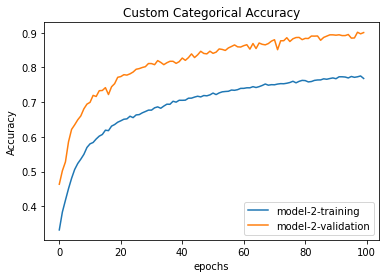

In [38]:
plt.plot(history_2.history['custom_categorical_accuracy'], label='model-2-training')
plt.plot(history_2.history['val_custom_categorical_accuracy'], label='model-2-validation')
plt.title('Custom Categorical Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### 比較

In [39]:
model_1.load_weights('./models/Ch6/save-1.h5')
model_2.load_weights('./models/Ch6/save-2.h5')
loss_1, acc_1 = model_1.evaluate(test_data)
loss_2, acc_2 = model_2.evaluate(test_data)
loss = [loss_1, loss_2]
acc = [acc_1, acc_2]
dict = {"Accuracy":acc, "Loss":loss}
pd.DataFrame(dict)

79/79 [==============================] - 1s 8ms/step - loss: 0.5612 - custom_categorical_accuracy: 0.8173


,Accuracy,Loss
0,0.8105,0.569560
1,0.8173,0.561221
